# Python for stock analysis

The original article is in [here](https://medium.com/analytics-vidhya/python-for-stock-analysis-fcff252ca559)

Again, we’ll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

### Imports

In [40]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
import seaborn as sns

### Load CSV

In [41]:
TSLA = pd.read_csv("TSLA.csv")
AMZN = pd.read_csv("AMZN.csv")

In [43]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,462.259954,473.618166,449.172169,462.570402,462.570402,5.662960e+07
std,224.807500,228.966352,219.266924,224.706103,224.706103,3.133967e+07
min,139.794006,146.145996,134.757996,137.343994,137.343994,1.515770e+07
25%,283.201996,293.000000,275.201996,283.713989,283.713989,3.333730e+07
50%,425.256012,434.589996,417.600006,424.679993,424.679993,4.814560e+07
75%,662.130005,677.799988,641.109985,661.770020,661.770020,7.469750e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


In [44]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


## Whats the change in stocks price over time?

We’ll be analysing the last year i.e. 2020 data, so we have Pandas with another property called ‘truncate’ with which we can plot the data between specific dates.


In [2]:
# Plotting the stock's adjusted closing price using pandas
TSLA.set_index('Date', inplace=True)
TSLA.truncate(after='2021-01-01')['Close'].plot(legend=True,figsize=(12,5))

# Plotting the stock's adjusted closing price using pandas
TSLA.set_index('Date', inplace=True)
TSLA.truncate(after='2021-01-01')['Close'].plot(legend=True,figsize=(12,5))

NameError: name 'TSLA' is not defined

<AxesSubplot:xlabel='Date'>

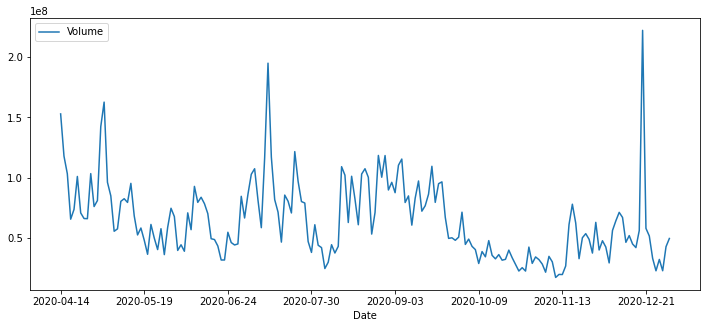

In [46]:
# Plotting the total volume being traded over time
TSLA.truncate(before='2020-01-01', after='2021-01-01')['Volume'].plot(legend=True,figsize=(12,5))


### What are techincal indicators and how to use them

Technical indicators are exploratory variables usually derived from a stock’s price and volume. They are used to explain a stock’s price movements in hopes of predicting future swings. In other words, they are used to determine whether a stock is “overbought” or “oversold”. Though these indicators are widely exploited by both independent investors and hedge funds alike, many people do not have quick way of obtaining them. They have to resort to calculating each indicator one at a time. This process takes a great deal of time and computational power. Believe me. I’ve spent my fair share of time coding this process using python in the past.

Calculating technical indicators takes time away from the modeling process and can therefore be a deterrent to building more complex statistical models. With the TA (technical analysis) library though, we can substantiate any stock’s historical price data with more than 40 different technical indicators using just one line of code.
Install the TA (technical analysis) library

## What was the moving average of various stocks?

Let’s check out the moving average for stocks over a 10, 20 and 50 day period of time. We’ll add that information to the stock’s dataframe.

In [47]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    TSLA[column_name] = TSLA['Adj Close'].rolling(window=ma,center=False).mean()

TSLA.tail()  

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300,657.312994,666.177493,721.797797
2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21402600,660.975995,665.048496,718.054998
2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700,669.302991,665.460996,715.385997
2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44534700,684.405994,668.179996,714.761797
2021-04-14,770.700012,780.789978,733.726685,737.020081,737.020081,43959273,694.546002,671.187000,712.705999


Let’s plot the same, again using only last year i.e. 2020 data.


<AxesSubplot:xlabel='Date'>

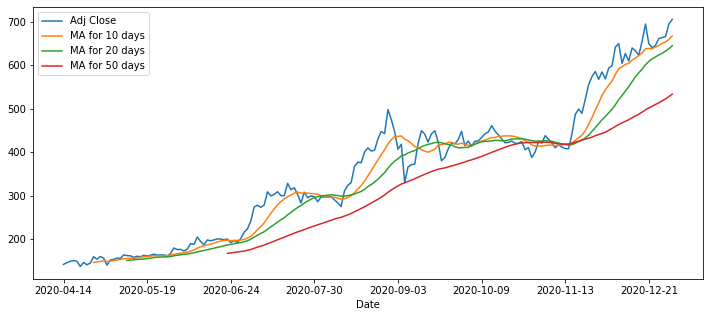

In [48]:
TSLA.truncate(before='2020-01-01', after='2021-01-01')[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))


Moving averages for more days have a smoother plot, as they’re less reliable on daily fluctuations.

Why are the moving averages important?

Moving averages are used to identify significant support and resistance levels.

Traders watch for crossovers of longer-term moving averages by shorter-term moving averages as possible indicators of trend changes to enter long and short positions.

According to Stan Weinstein: The price must be above the short term MA in order to buy a stock.

### What was the daily return average of a stock?

<AxesSubplot:xlabel='Date'>

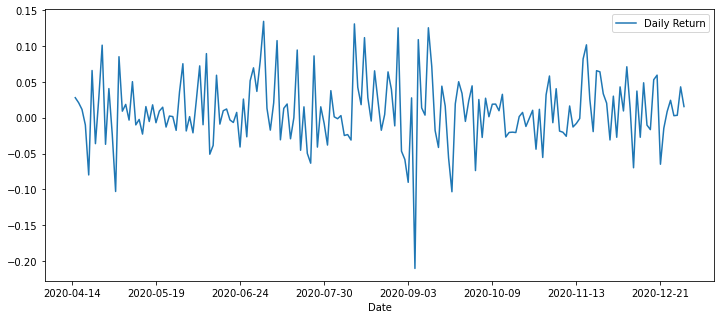

In [49]:
# The daily return column can be created by using the percentage change over the adjusted closing price
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

# Plotting the total volume being traded over time
TSLA.truncate(before='2020-01-01', after='2021-01-01')['Daily Return'].plot(legend=True,figsize=(12,5))

Now we will check how much positive or negative return we got, through a distplot of Seaborn library. A little about distplot before we do the plotting.
Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.


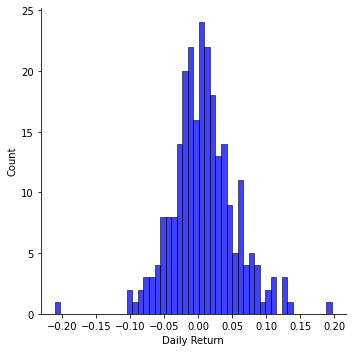

In [50]:
sns.displot(TSLA["Daily Return"].dropna(),bins=50,color="blue")


Positive daily returns seem to be slightly more frequent than negative returns.

### What was the correlation between daily returns of different stocks?

I wrote an [article](https://medium.com/analytics-vidhya/how-to-create-a-stock-correlation-matrix-in-python-4f32f8cb5b50) on this before, you can check that out.

In [1]:
# Creating a list to store all our data variables
ticker_list = [AMZN, TSLA]
data = []
for ticker in ticker_list:
    # Creating an empty dataframe to transfer data from data variable
    ticker_data = pd.DataFrame()
    # Using only 2020 data
    ticker_data = ticker.truncate(before='2020-01-01', after='2021-01-01')[['Adj Close']]
    ticker_data.reset_index()
    data.append(ticker_data)

NameError: name 'AMZN' is not defined